In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('McDonalds_Financial_Statements.csv')

In [6]:
print(df.columns)


Index(['Year', 'Market cap ($B)', 'Revenue ($B)', 'Earnings ($B)', 'P/E ratio',
       'P/S ratio', 'P/B ratio', 'Operating Margin (%)', 'EPS ($)',
       'Shares Outstanding ($B)', 'Cash on Hand ($B)', 'Dividend Yield (%)',
       'Dividend (stock split adjusted) ($)', 'Net assets ($B)',
       'Total assets ($B)', 'Total debt ($B)', 'Total liabilities ($B)'],
      dtype='object')


In [7]:
# Convert Year to datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Remove "$" and "B" and convert to float
cols_to_clean = [
    'Market cap ($B)', 'Revenue ($B)', 'Earnings ($B)', 'EPS ($)', 
    'Shares Outstanding ($B)', 'Cash on Hand ($B)', 
    'Dividend (stock split adjusted) ($)', 'Net assets ($B)',
    'Total assets ($B)', 'Total debt ($B)', 'Total liabilities ($B)'
]

for col in cols_to_clean:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calculate Growth Columns
df['Revenue Growth (%)'] = df['Revenue ($B)'].pct_change() * 100
df['Earnings Growth (%)'] = df['Earnings ($B)'].pct_change() * 100
df['Debt to Equity Ratio'] = df['Total debt ($B)'] / df['Net assets ($B)']
df['Asset to Liability Ratio'] = df['Total assets ($B)'] / df['Total liabilities ($B)']

# Preview Cleaned Data
df.head()

,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),...,Dividend Yield (%),Dividend (stock split adjusted) ($),Net assets ($B),Total assets ($B),Total debt ($B),Total liabilities ($B),Revenue Growth (%),Earnings Growth (%),Debt to Equity Ratio,Asset to Liability Ratio
0,2022-01-01,193.01,23.18,7.82,31.3,8.33,-32.2,33.76,8.42,0.73,...,2.15,5.66,-6.01,50.43,48.03,56.43,NaN,NaN,-7.991681,0.893674
1,2021-01-01,200.31,23.22,9.12,26.5,8.63,-43.5,39.31,10.11,0.74,...,1.96,5.25,-4.61,53.60,48.64,58.20,0.172563,16.624041,-10.550976,0.920962
2,2020-01-01,159.88,19.20,6.14,33.8,8.32,-20.4,31.97,6.35,0.74,...,2.35,5.04,-7.83,52.62,48.51,60.45,-17.312661,-32.675439,-6.195402,0.870471
3,2019-01-01,147.47,21.28,8.01,24.8,6.93,-18.0,38.04,7.98,0.74,...,2.39,4.73,-8.22,47.51,46.87,55.72,10.833333,30.456026,-5.701946,0.852656
4,2018-01-01,136.21,21.02,7.81,23.2,6.48,-21.8,37.17,7.65,0.76,...,2.36,4.19,-6.26,32.81,31.07,39.06,-1.221805,-2.496879,-4.963259,0.839990


The below visualisation is done to get an idea how the earnings and revenue changed for McDonald's in teh period of 21 years. 

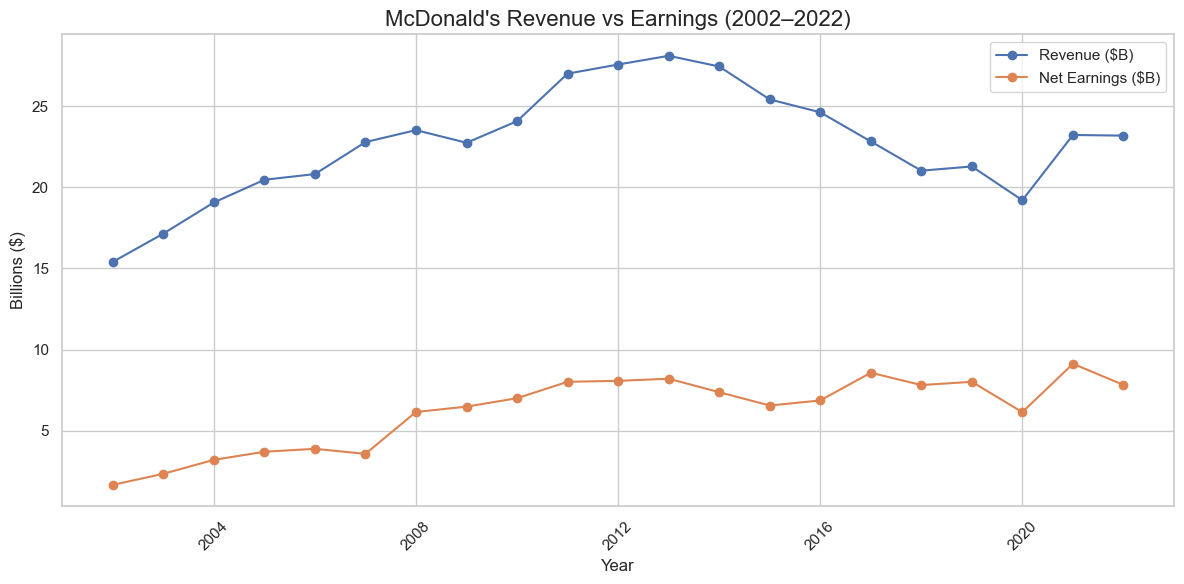

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

# Line plot of Revenue and Earnings
plt.plot(df['Year'], df['Revenue ($B)'], label='Revenue ($B)', marker='o')
plt.plot(df['Year'], df['Earnings ($B)'], label='Net Earnings ($B)', marker='o')

plt.title('McDonald\'s Revenue vs Earnings (2002–2022)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Billions ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Now we can move on and check the operating margins over time. 

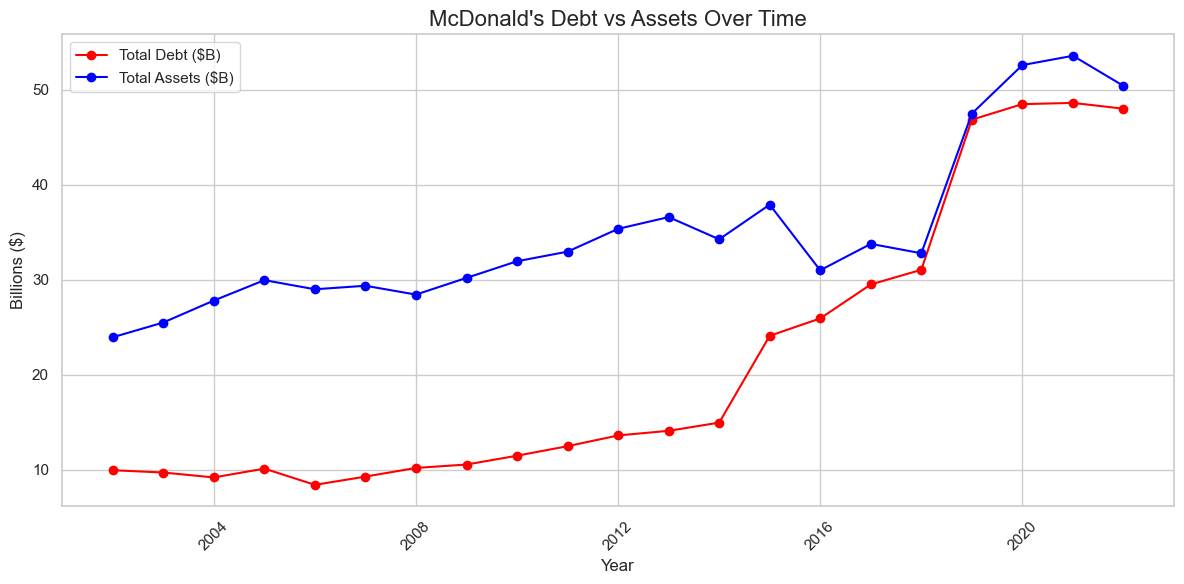

In [9]:
plt.figure(figsize=(12, 6))

plt.plot(df['Year'], df['Total debt ($B)'], label='Total Debt ($B)', marker='o', color='red')
plt.plot(df['Year'], df['Total assets ($B)'], label='Total Assets ($B)', marker='o', color='blue')

plt.title("McDonald's Debt vs Assets Over Time", fontsize=16)
plt.xlabel('Year')
plt.ylabel('Billions ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Now Lets cheeck the P/E Ratio Over Time which is Price to Earnings Ratio.

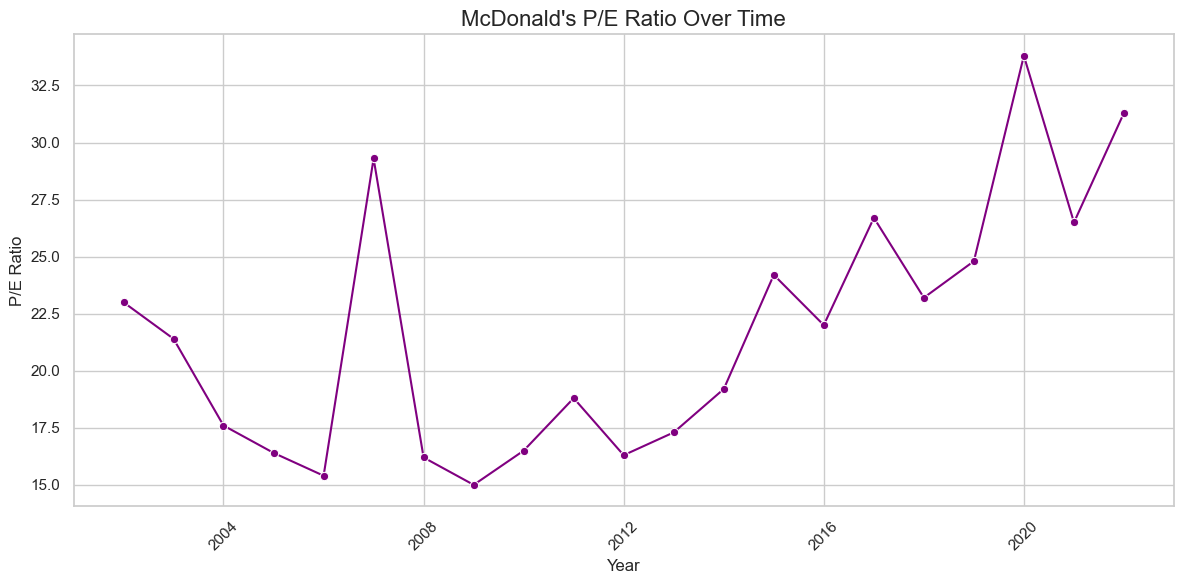

In [10]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='Year', y='P/E ratio', data=df, marker='o', color='purple')

plt.title("McDonald's P/E Ratio Over Time", fontsize=16)
plt.xlabel('Year')
plt.ylabel('P/E Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Lastly, lets check the dividend per share over time.

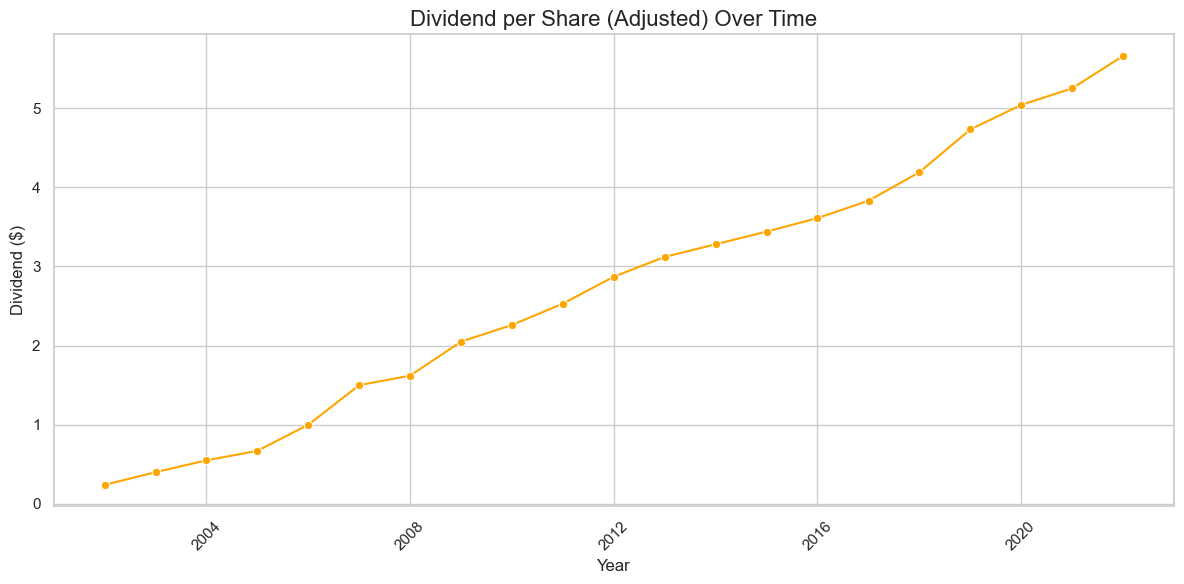

In [11]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='Year', y='Dividend (stock split adjusted) ($)', data=df, marker='o', color='orange')

plt.title("Dividend per Share (Adjusted) Over Time", fontsize=16)
plt.xlabel('Year')
plt.ylabel('Dividend ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
df.to_csv("mcd_cleaned_financials.csv", index=False)